In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pkl

plt.style.use("default")

In [3]:
dataset = "CIFAR_seed=10000_"
with open(f"./{dataset}combined_list.pkl", "rb") as f:
    combined = pkl.load(f)

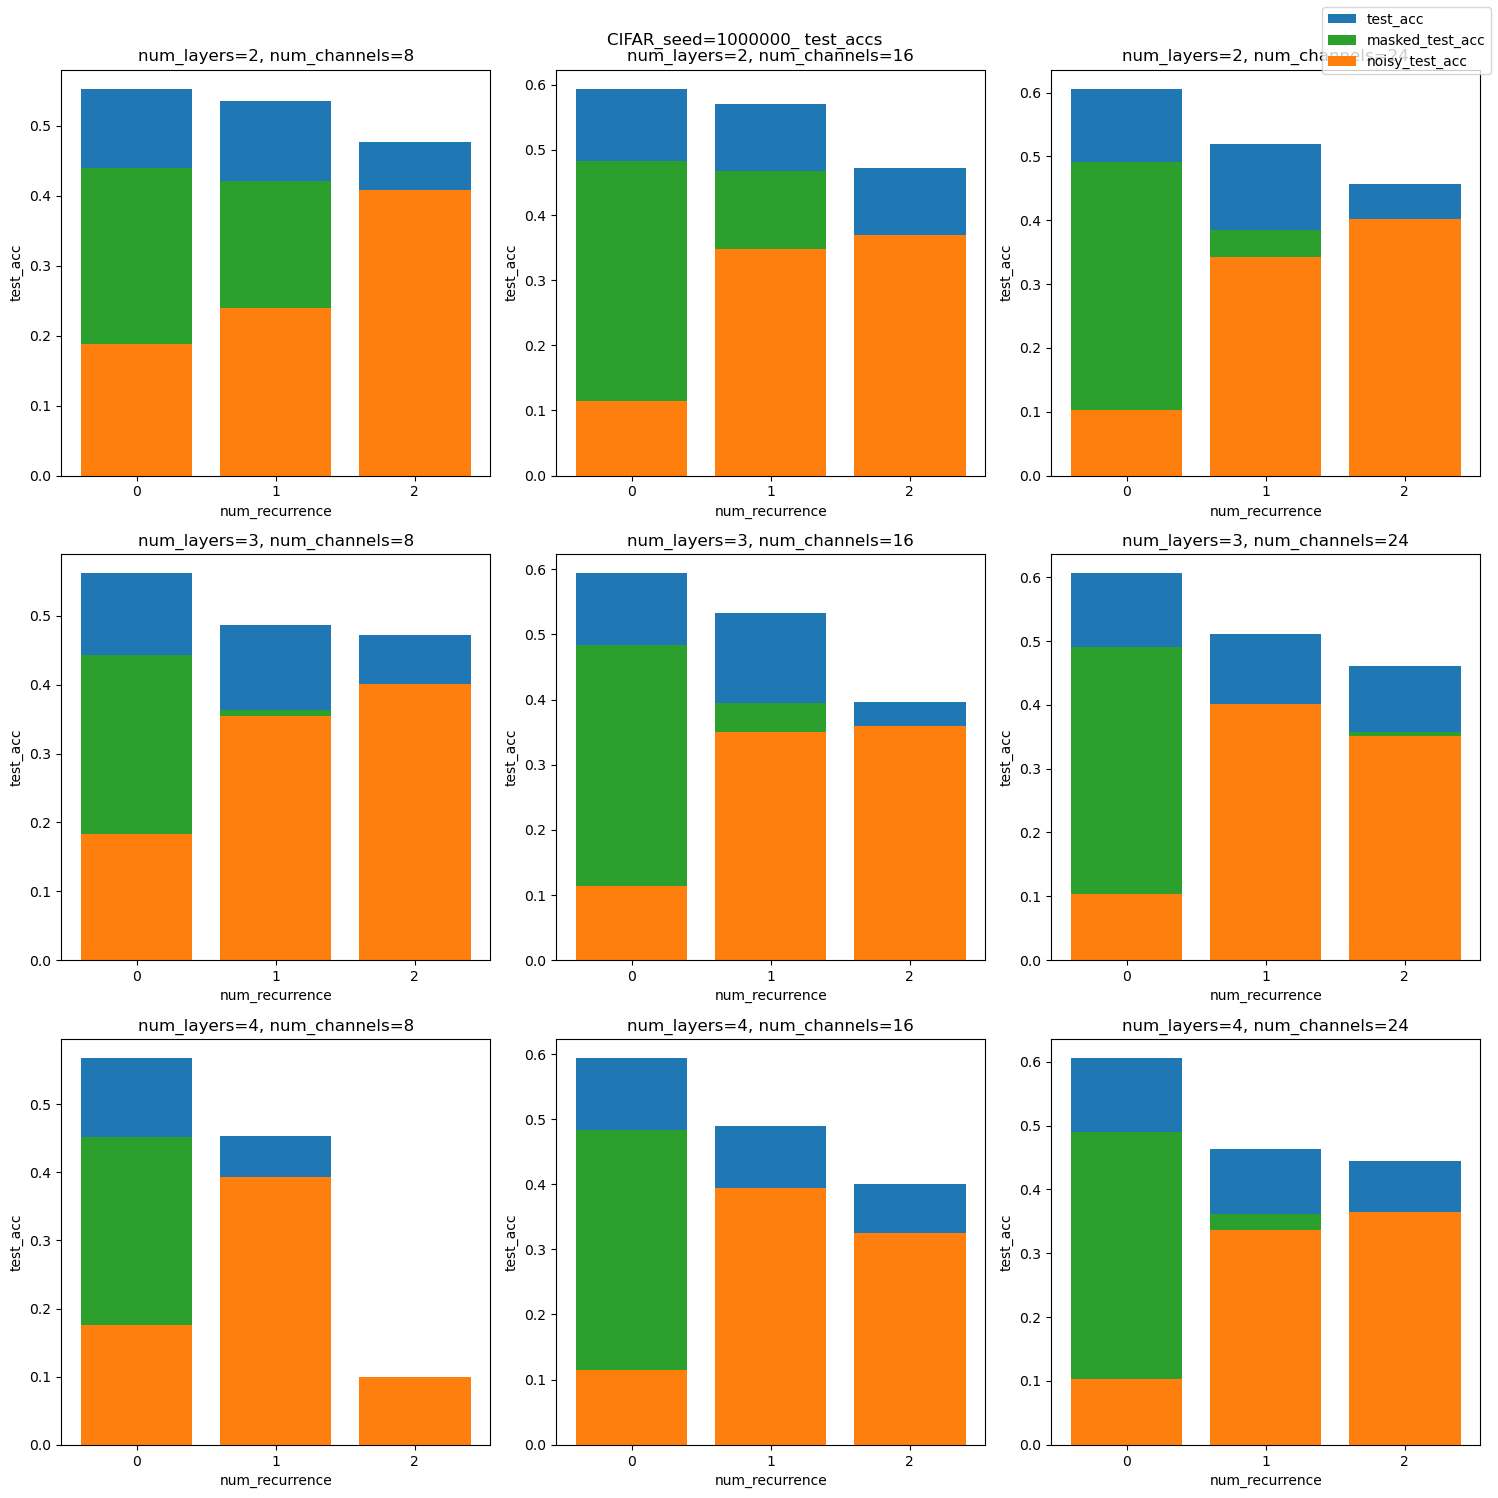

In [8]:
bar_width = 0.2
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for num_layers in range(3):
    for num_channels in range(3):
        # print(f'num_layers={num_layers}, num_recurrence={num_recurrence}')
        ax = axes[num_layers, num_channels]
        ax.set_title(
            f"num_layers={num_layers + 2}, num_channels={num_channels * 8 + 8}"
        )
        ax.set_xlabel("num_recurrence")
        ax.set_ylabel("test_acc")
        ax.bar(
            np.arange(3),
            combined["test_accs"][num_layers, :, num_channels],
            label="test_acc",
        )
        ax.bar(
            np.arange(3),
            combined["masked_test_accs"][num_layers, :, num_channels],
            label="masked_test_acc",
            color="tab:green",
        )
        ax.bar(
            np.arange(3),
            combined["noisy_test_accs"][num_layers, :, num_channels],
            label="noisy_test_acc",
            color="tab:orange",
        )

        ax.set_xticks(np.arange(3))
fig.suptitle(f"{dataset} test_accs")

handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels)
fig.tight_layout()
fig.savefig(f"{dataset}accuracy.png")

In [15]:
dataset = "mnist"
seeds = [0, 10, 100, 1000, 10000, 1000000]
all_acc = []
all_noisy_acc = []
all_masked_acc = []
for seed in seeds:
    with open(f"./results/{dataset}_seed={seed}_combined_list.pkl", "rb") as f:
        temp = pkl.load(f)
    all_acc.append(temp["test_accs"])
    all_noisy_acc.append(temp["noisy_test_accs"])
    all_masked_acc.append(temp["masked_test_accs"])
all_acc = np.array(all_acc)
all_noisy_acc = np.array(all_noisy_acc)
all_masked_acc = np.array(all_masked_acc)

In [23]:
acc_avg = np.mean(all_acc, axis=0)
acc_std = np.std(all_acc, axis=0)
noisy_acc_avg = np.mean(all_noisy_acc, axis=0)
noisy_acc_std = np.std(all_noisy_acc, axis=0)
masked_acc_avg = np.mean(all_masked_acc, axis=0)
masked_acc_std = np.std(all_masked_acc, axis=0)

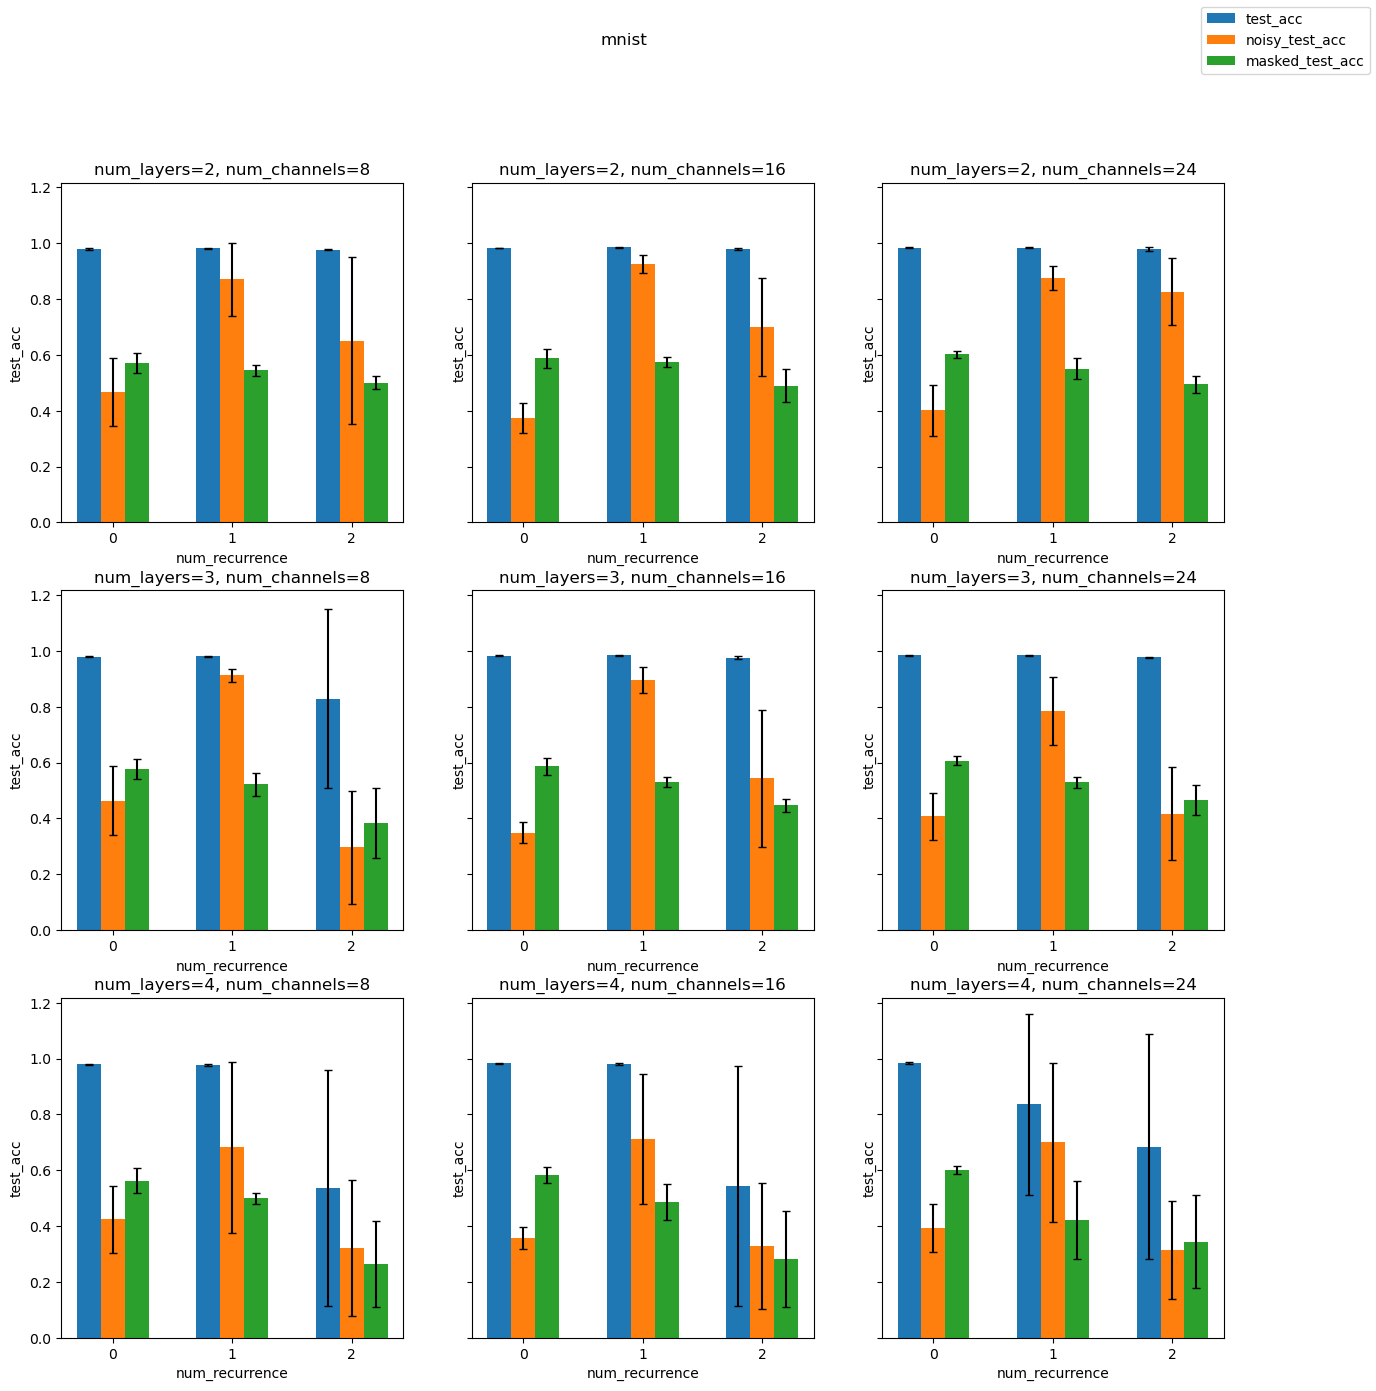

In [26]:
bar_width=0.2
fig, axes = plt.subplots(3, 3, figsize=(15, 15), sharey=True)
for num_layers in range(3):
    for num_channels in range(3):
        # print(f'num_layers={num_layers}, num_recurrence={num_recurrence}')
        ax = axes[num_layers, num_channels]
        ax.set_title(f'num_layers={num_layers + 2}, num_channels={num_channels * 8 + 8}')
        ax.set_xlabel('num_recurrence')
        ax.set_ylabel('test_acc')
        ax.bar(np.arange(3)-bar_width, acc_avg[num_layers, :, num_channels], yerr=acc_std[num_layers, :, num_channels], capsize=3, label='test_acc', width=bar_width)
        ax.bar(np.arange(3), noisy_acc_avg[num_layers, :, num_channels],  yerr=noisy_acc_std[num_layers, :, num_channels], capsize=3, label='noisy_test_acc', width=bar_width)
        ax.bar(np.arange(3)+bar_width, masked_acc_avg[num_layers, :, num_channels], yerr=masked_acc_std[num_layers, :, num_channels], capsize=3, label='masked_test_acc', width=bar_width)
        ax.set_xticks(np.arange(3))

fig.suptitle(dataset)
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels)

fig.savefig('accuracy_averaged_cifar.png')

In [18]:
# Now for MNIST

In [19]:
dataset = "MNIST_seed=0_"
with open(f"./{dataset}combined_list.pkl", "rb") as f:
    combined_seed_0 = pkl.load(f)

dataset = "MNIST_seed=10000_"
with open(f"./{dataset}combined_list.pkl", "rb") as f:
    combined_seed_10k = pkl.load(f)

dataset = "MNIST_seed=1000000_"
with open(f"./{dataset}combined_list.pkl", "rb") as f:
    combined_seed_1m = pkl.load(f)


In [20]:
# Average across datasets with different seeds
combined_averaged = {}
for key in combined_seed_0.keys():
    combined_averaged[key] = combined_seed_0[key] = (combined_seed_0[key] + combined_seed_10k[key] + combined_seed_1m[key]) / 3


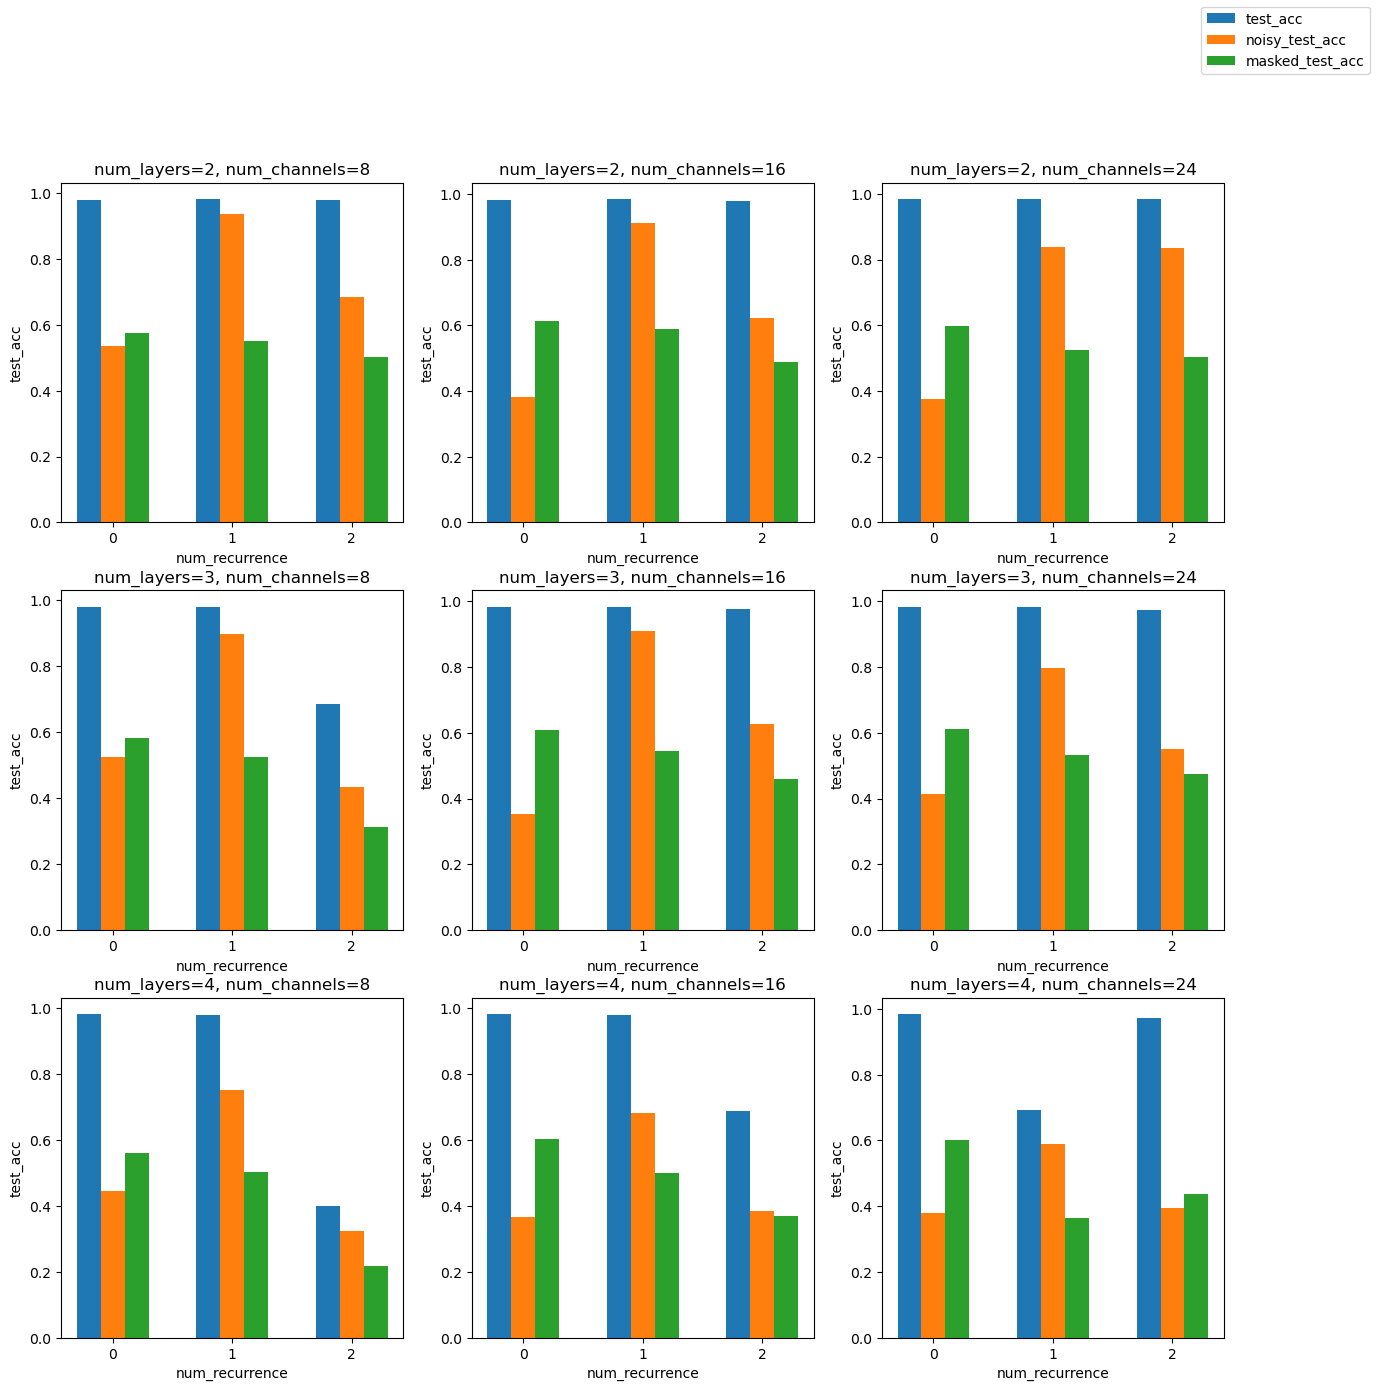

In [21]:
bar_width=0.2
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for num_layers in range(3):
    for num_channels in range(3):
        # print(f'num_layers={num_layers}, num_recurrence={num_recurrence}')
        ax = axes[num_layers, num_channels]
        ax.set_title(f'num_layers={num_layers + 2}, num_channels={num_channels * 8 + 8}')
        ax.set_xlabel('num_recurrence')
        ax.set_ylabel('test_acc')
        ax.bar(np.arange(3)-bar_width, combined_averaged['test_accs'][num_layers, :, num_channels], label='test_acc', width=bar_width)
        ax.bar(np.arange(3), combined_averaged['noisy_test_accs'][num_layers, :, num_channels], label='noisy_test_acc', width=bar_width)
        ax.bar(np.arange(3)+bar_width, combined_averaged['masked_test_accs'][num_layers, :, num_channels], label='masked_test_acc', width=bar_width)
        ax.set_xticks(np.arange(3))

handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels)
fig.savefig('accuracy_averaged_mnist.png')